In [1]:
import pickle
import pandas
import datetime
import numpy
import datetime

from matplotlib import pyplot
from matplotlib import dates
from scipy.spatial import Voronoi, voronoi_plot_2d
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import misc

from matplotlib import cm
from matplotlib import pyplot
from numpy import linalg
from numpy import random
from random import sample
from scipy import signal 
from scipy import stats
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict

import dmr
import datetime
import foursquare
import geopandas
import math
import numpy
import pandas
import pickle
import pymongo
import time
import seaborn

In [2]:
sq_leaf = (5.0, 3.0)

In [3]:
def leaf(name):
    fig.savefig('lab_plot/'+name+'.eps', dpi=150, format='eps', transparent=True, pad_inches=0.10)

# DMR Snapshot

In [4]:
col = {45:'blue', 55:'purple', 65:'red', 75:'orange', 85:'yellow'}

In [5]:
lda = {45:None, 55:None, 65:None, 75:None, 85:None}
for i in lda:
    lda[i] = pickle.load(open('kato_dmr/'+str(i)+'lda.pkl', 'rb'))

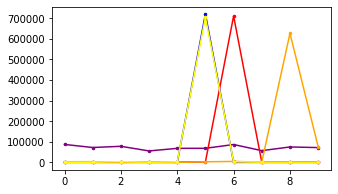

In [6]:
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()
for i in lda:
    tmp = lda[i].z_m_n
    t = numpy.array(tmp).ravel()
    y, x = numpy.histogram(t, numpy.arange(0, max(t)+2, 1))
    ax.plot(x[:-1], y, marker='.',ms=5.0, linestyle='-', color=col[i])

### Disto delta-T

In [7]:
next_df = pickle.load(open('archive/bikemi_dataframe.pkl', 'rb'))

In [8]:
tmp = numpy.array(next_df['Durata_sec'].tolist())
a = tmp/60

Text(6, 30000, '$0.5p$')

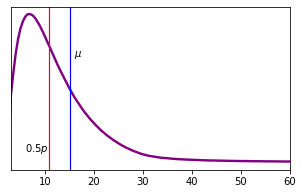

In [9]:
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()
eps = 0.5
y, x = numpy.histogram(a, numpy.arange(0, max(a)+2*eps, eps))
ax.plot(x[:-1], y, marker='.',ms=0.0, linewidth=2.4, linestyle='-', color='purple')
ax.set_xlim(3, 60)
ax.axes.get_yaxis().set_visible(False)
ax.axvline(x=numpy.mean(a), color='blue', linewidth=1.2)
ax.axvline(x=numpy.median(a), color='red', linewidth=1.2)
ax.text(16, 300000,'$\mu$')
ax.text(6, 30000,'$0.5p$')

In [10]:
leaf('delta-time-distro')

In [11]:
numpy.mean(a), numpy.percentile(a, 50), numpy.std(a), numpy.where(y == max(y))[0][0]*eps

(15.035625407560817, 10.866666666666667, 30.581304023183502, 7.0)

In [12]:
y[:30]

array([  1760,   1010,    230,     63,     64,     80, 185922, 250280,
       306942, 350260, 380965, 401193, 414826, 421393, 421441, 417916,
       410236, 399244, 387005, 372993, 357734, 342126, 327306, 310997,
       295576, 279759, 265009, 251269, 237622, 224060])

In [13]:
numpy.percentile(a, 25), numpy.percentile(a, 75)

(7.166666666666667, 16.466666666666665)

(0, 60)

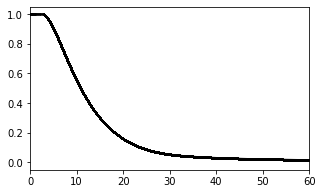

In [14]:
# CCDF
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()
ecdf = ECDF(a)
ax.plot(ecdf.x, 1-ecdf.y, marker='.',ms=0.5, linestyle='-', color='black')
ax.set_xlim(0, 60)
#ax.set_ylim(0, 250)

In [15]:
ecdf(10)-ecdf(3)

0.4474570818818065

### Partenze e arrivi

In [16]:
def nit(t):
    return 60*(60*t.hour+t.minute)+t.second

In [17]:
a = [nit(i) for i in next_df['Data_prelievo'].tolist()]
b = [nit(i) for i in next_df['Data_arrivo'].tolist()]

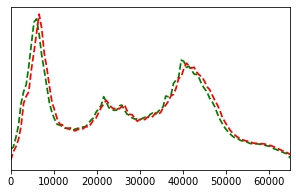

In [18]:
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()
eps = 10*60
sh = 7*60*60

y, x = numpy.histogram(a, numpy.arange(0, 86400+eps, eps))
y = numpy.roll(y, int(-sh/eps))
ax.plot(x[:-1], y, marker='o',ms=0.0, linewidth=1.75, linestyle='--', color='green')

y, x = numpy.histogram(b, numpy.arange(0, 86400+eps, eps))
y = numpy.roll(y, int(-sh/eps))
ax.plot(x[:-1], y, marker='o',ms=0.0, linewidth=1.75, linestyle='--', color='red')

ax.set_xlim(0, 18*60*60)
ax.axes.get_yaxis().set_visible(False)

In [19]:
t1 = [l.get_text() for l in ax.get_xticklabels()]
t2 = [int((int(i)+sh)%86400/60/60) for i in t1]
ax.set_xticklabels(t2)

[Text(0.0, 0, '7'),
 Text(10000.0, 0, '9'),
 Text(20000.0, 0, '12'),
 Text(30000.0, 0, '15'),
 Text(40000.0, 0, '18'),
 Text(50000.0, 0, '20'),
 Text(60000.0, 0, '23'),
 Text(70000.0, 0, '2')]

In [20]:
leaf('partenza-arrivo-distro')

## Voronoi Plots 

In [21]:
gps = pickle.load(open('/home/datasets/bikemi/station_gps_location.pkl', 'rb'))

In [22]:
lst = [(g[1],g[0]) for g in gps.values()]
raw_voronoi = Voronoi(lst)

In [23]:
# figur-tela e i sui assi
fig = pyplot.figure(figsize=sq_leaf)

<Figure size 360x216 with 0 Axes>

In [24]:
ax = fig.gca()

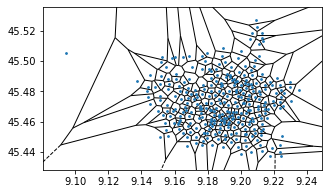

In [25]:
voronoi_plot_2d(
    raw_voronoi,
    ax = ax,
    show_points = True,
    show_vertices = False,
    line_colors = "black",
    line_width = 1.0,
    line_alpha = 1.0,
    point_size = 3.5
)

In [26]:
leaf('voronoi-galaxy')

(45.34810425283237, 45.673936986555596)

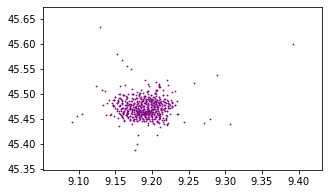

In [27]:
# figur-tela e i sui assi
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()

cy = [i[1] for i in raw_voronoi.vertices]
cx = [i[0] for i in raw_voronoi.vertices]

ax.plot(cx, cy, marker='.',ms=1.5, linestyle=' ', color='purple')

ax.set_xlim(min(cx)-0.04,max(cx)+0.04)
ax.set_ylim(min(cy)-0.04,max(cy)+0.04)

### Sample 

In [28]:
csv_uri = '/home/datasets/bikemi/2017/12 2017.csv'

In [29]:
df = pandas.read_csv(csv_uri,
                           lineterminator ='\r',
                           encoding = 'iso8859_2',
                           sep = ';',
                           parse_dates = ['Data_prelievo','Data_arrivo'],
                           date_parser = lambda x: datetime.datetime.strptime(x,'%d/%m/%y %H:%M'),
                           decimal = '.'
                          )

In [30]:
nomi = set()
for _, i in df.iterrows():
    nomi.add(i['Nome_stazione_arrivo'])
    nomi.add(i['Nome_stazione_prelievo'])

In [31]:
nomi

{'Accursio - Portello',
 'Adamello - Lorenzini',
 'Alserio - Cola Montano',
 'Amendola M1',
 'Aquileia',
 'Arcivescovado',
 'Arco della Pace 1 - Bertani',
 'Arco della Pace 2 - Pagano',
 'Arcole - Argelati',
 'Arduino',
 'Ascanio Sforza - Pavia',
 'Aspromonte - Pecchio',
 'Augusto',
 'B.Marcello - Boscovich',
 'Bacone - Monteverdi',
 'Baldinucci - Maffucci',
 'Balilla - Tibaldi',
 'Bassini - Grossich',
 'Bastioni di Porta Venezia',
 'Bausan - Brofferio',
 "Beatrice d'Este - Cassolo",
 'Beccaria',
 'Benaco - Brembo',
 'Bergognone - Tortona',
 'Bernini',
 'Bertarelli',
 'Bicocca M5 - Pulci',
 'Bocconi 2 - Bach',
 'Bocconi 3 - I. Aragona',
 'Bonomelli',
 'Borgogna',
 'Borsieri - Confalonieri',
 'Bovisa - Lambruschini',
 'Bovisa Passante 1 - Alfieri',
 'Brenta MM',
 'Brera',
 'Brescia',
 'Brianza - Venini',
 'Bronzetti - Archimede',
 'Buenos Aires - Argentina',
 'Buenos Aires - Lima',
 'Buonarroti',
 'Bussero - F. Testi',
 "Ca' Granda - F. Testi",
 'Cadore - Pinaroli',
 'Cadorna 1',
 'Cado

In [32]:
df.columns

Index(['Bicicletta', 'Tipo_bici', 'Cliente', 'Data_riferimento_prelievo',
       'Data_prelievo', 'Ora_prelievo', 'Giorno_prelievo', 'Mese_prelievo',
       'Anno_prelievo', 'GMA_prelievo', 'Gio_settimana_prelievo',
       'Festivo_feriale_prelievo', 'Fascia_oraria_prelievo',
       'Stazione_prelievo', 'Nome_stazione_prelievo', 'Slot_prelievo',
       'Data_riferimento_arrivo', 'Data_arrivo', 'Ora_arrivo', 'Giorno_arrivo',
       'Mese_arrivo', 'Anno_arrivo', 'GMA_arrivo', 'Gio_settimana_arrivo',
       'Festivo_feriale_arrivo', 'Fascia_oraria_arrivo', 'Stazione_arrivo',
       'Nome_stazione_arrivo', 'Slot_arrivo', 'Durata_noleggio', 'Durata_sec',
       'Distanza_totale', 'Co2_evitata', 'Calorie_consumate', 'Temp_min_GP',
       'Temp_max_GP', 'Temp_media_GP', 'Precipitazioni_GP', 'Press_atm_GP',
       'Temp_min_GA', 'Temp_max_GA', 'Temp_media_GA', 'Precipitazioni_GA',
       'Press_atm_GA', 'Pm10_GP', 'Pm25_GP', 'No2_mean_GP', 'Co_mean_GP',
       'Pm10_GA', 'Pm25_GA', 'No2_mean_G

### Beta distro

NameError: name 'categories' is not defined

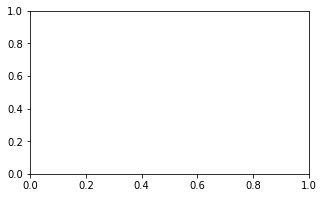

In [33]:
# distro word topic
rgb = ['black','grey','pink','brown','purple','blue','green','yellow','orange','red']
fig = pyplot.figure(figsize=sq_leaf)
ax = fig.gca()
for i in range(len(categories)):
    t= [b[i,j] for j in range(len(b[i]))]
    x, y = numpy.histogram(t, range(max(t)))
    ax.loglog(y[1:], x, marker='.',ms=2.25, linestyle='', color=rgb[i])